# Predicting Purchase Value from Multi-Session User Behavior

# Sections:
## 1.Objective
## 2.Dataset Loading and Initial Exploration
## 3.Data Cleaning
## 4.Exploratory Data Analysis
## 5.Feature Analysis
## 6.Final Inspection
## 7.Feature Engineering 
## 8.Modeling with Preprocessing (using Pipelines)
## 9.Insights on EDA and Linear Models
## 10.Dimensionality Reduction
## 11.Classic ML Models
## 12.Ensemble Models
## 13.Multilayer Percepton Regressor
## 14.Final Touches
## 15.Models Comparison
## 16.Saving Model
## 16.Conclusion

## 📌 Objective
The aim of this project is to build a predictive model that estimates the purchase value of users based on their multi-session behavior data. This helps in understanding user engagement and targeting strategies to optimize revenue.

## 📌 Dataset Loading and Initial Exploration

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('user_session.csv')

In [3]:
df.shape

(116023, 52)

In [4]:
df.head()

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


## 📌 Data Cleaning

In [5]:
print(df.isnull().sum())

trafficSource.isTrueDirect                       73133
purchaseValue                                        0
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
userId                                               0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
gclIdPresent                                         0
device.operatingSystemVersion                        0
sessionNumber                                        0
device.fla

In [6]:
# Convert to % to check the percentage of null values missing
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)

null_percent.to_frame(name='Missing (%)')

,Missing (%)
trafficSource.adContent,97.446196
trafficSource.adwordsClickInfo.isVideoAd,96.310214
trafficSource.adwordsClickInfo.slot,96.310214
trafficSource.adwordsClickInfo.adNetworkType,96.310214
trafficSource.adwordsClickInfo.page,96.310214
trafficSource.referralPath,63.184886
trafficSource.isTrueDirect,63.033192
trafficSource.keyword,61.936857
totals.bounces,59.363230
new_visits,30.601691


In [7]:
null_cols = ['trafficSource.adContent','trafficSource.adwordsClickInfo.isVideoAd','trafficSource.adwordsClickInfo.slot',
             'trafficSource.adwordsClickInfo.adNetworkType','trafficSource.adwordsClickInfo.page','trafficSource.referralPath',
             'trafficSource.isTrueDirect','trafficSource.keyword','totals.bounces','new_visits','pageViews']

df[null_cols].nunique().sort_values(ascending=False)

trafficSource.referralPath                      941
trafficSource.keyword                           566
pageViews                                       175
trafficSource.adContent                          53
trafficSource.adwordsClickInfo.page               5
trafficSource.adwordsClickInfo.slot               3
trafficSource.adwordsClickInfo.adNetworkType      2
trafficSource.adwordsClickInfo.isVideoAd          1
trafficSource.isTrueDirect                        1
totals.bounces                                    1
new_visits                                        1
dtype: int64

### Columns to fill:
- trafficSource.isTrueDirect &nbsp;&nbsp;&nbsp; # Only True values. Fill NaN to False
- total.bounces &nbsp;&nbsp;&nbsp;# Only 1 values. Fill NaN to 0
- new_visits &nbsp;&nbsp;&nbsp;# Only 1 values. Fill NaN to 0


In [8]:
df['trafficSource.isTrueDirect'] = df['trafficSource.isTrueDirect'].fillna(False)

C:\Users\jibin\AppData\Local\Temp\ipykernel_7092\85286888.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['trafficSource.isTrueDirect'] = df['trafficSource.isTrueDirect'].fillna(False)


In [9]:
df['totals.bounces'] = df['totals.bounces'].fillna(0)

In [10]:
df['new_visits'] = df['new_visits'].fillna(0)

### Columns to transform:
- date &nbsp;&nbsp;&nbsp;# Turn it from float64 to datetime (20170714.0 to 2017-07-14)

In [11]:
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
df['sessionStart'] = pd.to_datetime(df['sessionStart'], unit='s')

### Columns to drop:
- trafficSource.keyword &nbsp;&nbsp;&nbsp; # High Cardinality
- trafficSource.adwordsClickInfo.slot &nbsp;&nbsp;&nbsp;# Too many null values
- trafficSource.adwordsClickInfo.isVideoAd &nbsp;&nbsp;&nbsp;# Too many null values
- trafficSource.adwordsClickInfo.adNetworkType &nbsp;&nbsp;&nbsp;# Too many null values
- trafficSource.adwordsClickInfo.page &nbsp;&nbsp;&nbsp;# Too many null values
- trafficSource.referralPath &nbsp;&nbsp;&nbsp;# High cardinality and also too many null values
- socialEngagementType &nbsp;&nbsp;&nbsp;# Redundant
- locationZone &nbsp;&nbsp;&nbsp;# Redundant
- trafficSource.adContent &nbsp;&nbsp;&nbsp;# Redundant
- totals.visits &nbsp;&nbsp;&nbsp;# Redundant
- sessionId &nbsp;&nbsp;&nbsp;# unique to each row
- userId &nbsp;&nbsp;&nbsp;# unique to each row

In [12]:
cols_to_drop = [
    'trafficSource.keyword',
    'trafficSource.adwordsClickInfo.slot',
    'trafficSource.adwordsClickInfo.isVideoAd',
    'trafficSource.adwordsClickInfo.adNetworkType',
    'trafficSource.adwordsClickInfo.page',
    'trafficSource.referralPath',
    'socialEngagementType',
    'locationZone',
    'trafficSource.adContent',
    'totals.visits',
    'sessionId',
    'userId',
]

df.drop(columns=cols_to_drop, inplace=True)

In [13]:
#Check if there is any null columns left using the same code as above
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)

null_percent.to_frame(name='Missing (%)')

,Missing (%)
pageViews,0.006895


In [14]:
# We can safely drop the rows with null values since it's only a few
df = df.dropna()

## 📌 Exploratory Data Analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116015 entries, 0 to 116022
Data columns (total 40 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   trafficSource.isTrueDirect        116015 non-null  bool          
 1   purchaseValue                     116015 non-null  float64       
 2   browser                           116015 non-null  object        
 3   device.screenResolution           116015 non-null  object        
 4   screenSize                        116015 non-null  object        
 5   geoCluster                        116015 non-null  object        
 6   device.mobileDeviceBranding       116015 non-null  object        
 7   device.mobileInputSelector        116015 non-null  object        
 8   trafficSource.campaign            116015 non-null  object        
 9   device.mobileDeviceMarketingName  116015 non-null  object        
 10  geoNetwork.networkDomain          116

In [16]:
df.describe()

,purchaseValue,gclIdPresent,sessionNumber,pageViews,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160150e+05,116015.000000,116015.000000,116015.000000,116015.000000,116015,116015.000000,116015,116015.000000
mean,2.656576e+07,0.037021,2.690781,8.412352,0.406396,2017-04-28 06:08:48.200663808,10.608033,2017-04-29 01:34:41.866086144,0.694031
min,0.000000e+00,0.000000,1.000000,1.000000,0.000000,2016-08-01 00:00:00,1.000000,2016-08-01 07:10:57,0.000000
25%,0.000000e+00,0.000000,1.000000,1.000000,0.000000,2016-11-25 00:00:00,1.000000,2016-11-25 09:35:10,0.000000
50%,0.000000e+00,0.000000,1.000000,2.000000,0.000000,2017-04-08 00:00:00,2.000000,2017-04-08 10:16:09,1.000000
75%,0.000000e+00,0.000000,2.000000,10.000000,1.000000,2017-09-10 00:00:00,12.000000,2017-09-10 22:27:40,1.000000
max,2.312950e+10,1.000000,447.000000,469.000000,1.000000,2018-04-30 00:00:00,500.000000,2018-05-01 06:39:55,1.000000
std,2.051895e+08,0.188814,10.451411,14.344937,0.491162,NaN,19.630091,NaN,0.460819


In [17]:
df.nunique().sort_values(ascending=False)

sessionStart                        107380
purchaseValue                         6766
geoNetwork.city                        695
date                                   638
geoNetwork.region                      388
sessionNumber                          230
totalHits                              225
locationCountry                        193
pageViews                              175
trafficSource                          161
geoNetwork.metro                       104
browser                                 34
trafficSource.campaign                  28
geoNetwork.subContinent                 23
os                                      18
userChannel                              8
trafficSource.medium                     7
geoNetwork.continent                     6
geoCluster                               5
deviceType                               3
geoNetwork.networkDomain                 3
trafficSource.isTrueDirect               2
totals.bounces                           2
device.isMo

In [18]:
# Categorize columns with only one value to take a look at the values
cat_one_value = ['device.screenResolution', 'screenSize', 'device.mobileDeviceBranding','device.mobileInputSelector','device.mobileDeviceMarketingName','device.flashVersion',
                  'browserMajor','geoNetwork.networkLocation','device.operatingSystemVersion','device.browserSize','device.language','device.mobileDeviceModel','device.screenColors','device.browserVersion']
df[cat_one_value].head()

,device.screenResolution,screenSize,device.mobileDeviceBranding,device.mobileInputSelector,device.mobileDeviceMarketingName,device.flashVersion,browserMajor,geoNetwork.networkLocation,device.operatingSystemVersion,device.browserSize,device.language,device.mobileDeviceModel,device.screenColors,device.browserVersion
0,not available in demo dataset,medium,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,not available in demo dataset,medium,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,not available in demo dataset,medium,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,not available in demo dataset,medium,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,not available in demo dataset,medium,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [19]:
# We can safely drop these columns since none of the columns have any meaningful value
df.drop(cat_one_value, axis=1, inplace=True)

In [20]:
# Check if there is any other dummy strings left in the dataset
dummy_counts = (df == "not available in demo dataset").sum()
dummy_counts = dummy_counts[dummy_counts > 0].sort_values(ascending=False)
print(dummy_counts.sort_values(ascending=False))

geoNetwork.region    60132
geoNetwork.city      60132
geoNetwork.metro     60132
dtype: int64


In [21]:
# They take up more than half of the dataset. We can safely remove these columns
cols_to_drop = [
    'geoNetwork.region',
    'geoNetwork.city',
    'geoNetwork.metro'
]

df.drop(columns=cols_to_drop, inplace=True)

In [22]:
# Check for '(not set)' dummy string
dummy_counts1 = (df == "(not set)").sum()
dummy_counts1 = dummy_counts1[dummy_counts1 > 0].sort_values(ascending=False)
print(dummy_counts1.sort_values(ascending=False))

trafficSource.campaign     110273
os                            565
locationCountry               136
geoNetwork.subContinent       136
geoNetwork.continent          136
trafficSource.medium           10
trafficSource                   4
browser                         1
dtype: int64


In [23]:
# Check percentage to see how much of '(not set)' is there in each columns
dummy_percent1 = (dummy_counts1 / len(df)) * 100

dummy_percent1.to_frame(name='(not set) %').round(2)

,(not set) %
trafficSource.campaign,95.05
os,0.49
locationCountry,0.12
geoNetwork.subContinent,0.12
geoNetwork.continent,0.12
trafficSource.medium,0.01
trafficSource,0.00
browser,0.00


In [24]:
df.drop('trafficSource.campaign',axis=1, inplace=True) # Dropped due to high amount of placeholder data

In [25]:
# Run the previous code again to remove trafficSource.campaign from dummy_counts list
dummy_counts1 = (df == "(not set)").sum()
dummy_counts1 = dummy_counts1[dummy_counts1 > 0].sort_values(ascending=False)

# trafficSource.campaign was removed so we can safely drop the rows that contain '(not set)'
columns_to_check = dummy_counts1[dummy_counts1 > 0].index
df = df[~df[columns_to_check].isin(["(not set)"]).any(axis=1)]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115313 entries, 0 to 116022
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trafficSource.isTrueDirect  115313 non-null  bool          
 1   purchaseValue               115313 non-null  float64       
 2   browser                     115313 non-null  object        
 3   geoCluster                  115313 non-null  object        
 4   geoNetwork.networkDomain    115313 non-null  object        
 5   gclIdPresent                115313 non-null  int64         
 6   sessionNumber               115313 non-null  int64         
 7   trafficSource               115313 non-null  object        
 8   os                          115313 non-null  object        
 9   geoNetwork.subContinent     115313 non-null  object        
 10  trafficSource.medium        115313 non-null  object        
 11  locationCountry             115313 non-null 

# 📌 Feature Analysis

## Univariate Analysis
### Analysing Purchase Value

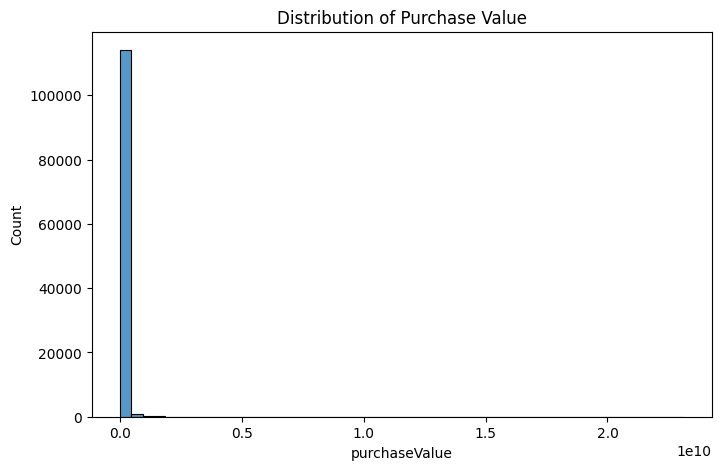

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df['purchaseValue'], bins=50)
plt.title('Distribution of Purchase Value')
plt.show()

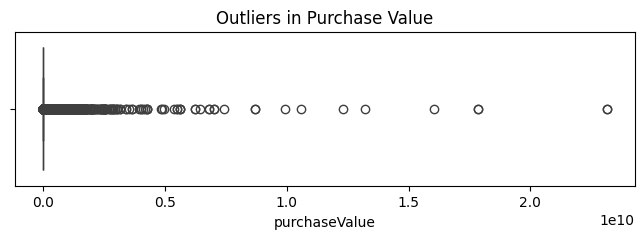

In [28]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['purchaseValue'])
plt.title('Outliers in Purchase Value')
plt.show()

In [29]:
df['purchaseValue'].skew()

np.float64(53.750076924959856)

- The dataset is Heavily right-skewed towards 0. This is common in an e-commerce website dataset as many users will visit pages without buying something. But this will be dangerous for linear models as it is sensitive to skewness.
- Log Tranformation is taken for less skewness. It is still positively skewed but less so.

In [30]:
df['log_purchaseValue'] = np.log(df['purchaseValue'] + 1)

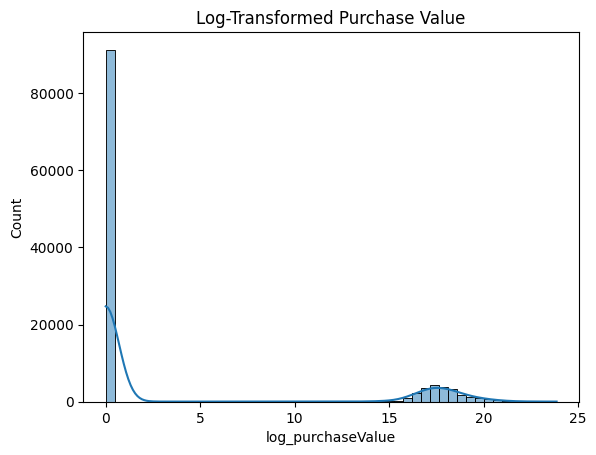

np.float64(1.460553015099928)

In [31]:
sns.histplot(df['log_purchaseValue'], bins=50, kde=True)
plt.title('Log-Transformed Purchase Value')
plt.show()
df['log_purchaseValue'].skew()

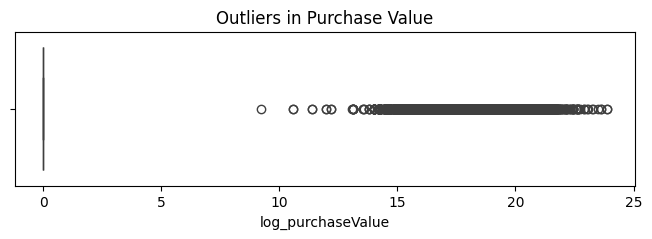

In [32]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['log_purchaseValue'])
plt.title('Outliers in Purchase Value')
plt.show()

### Categorical Columns

- Univartiate on multiple categorical columns with high cardinality - Clustered into less categories

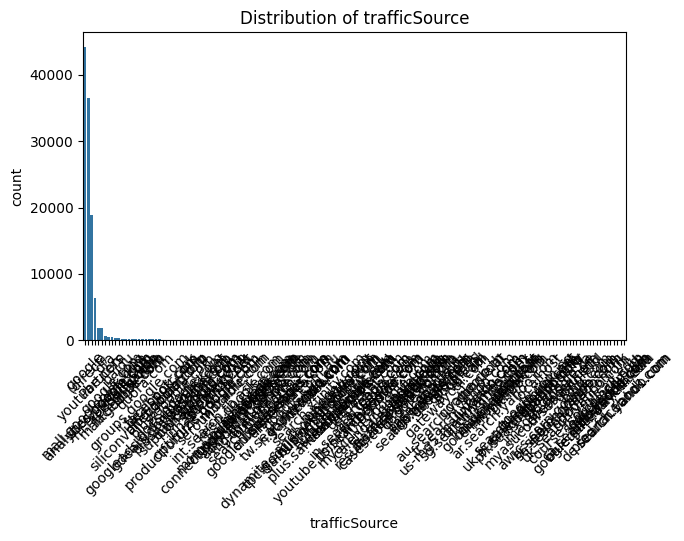

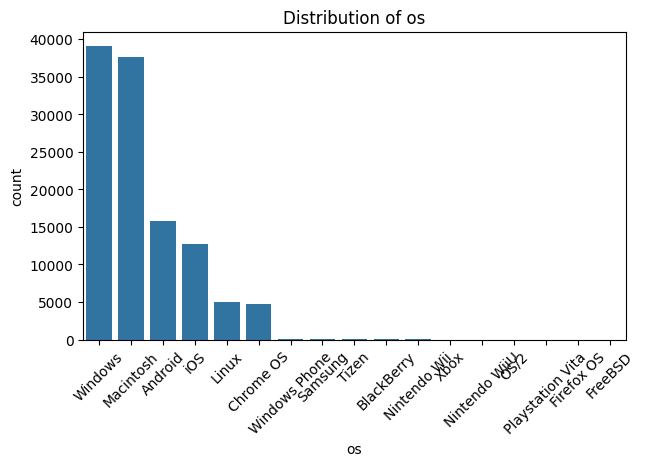

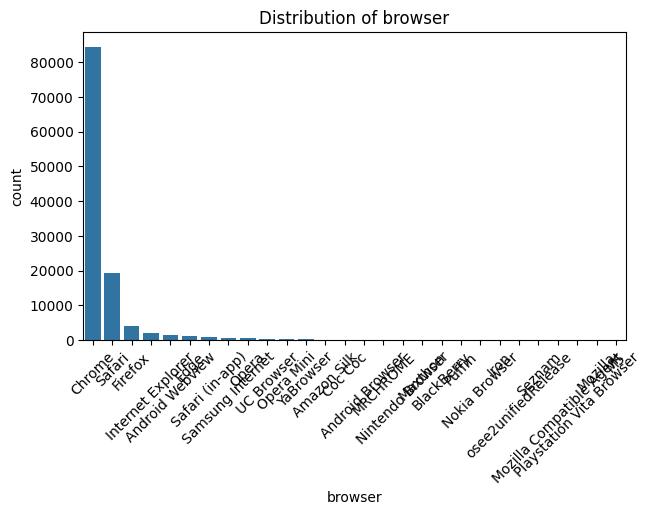

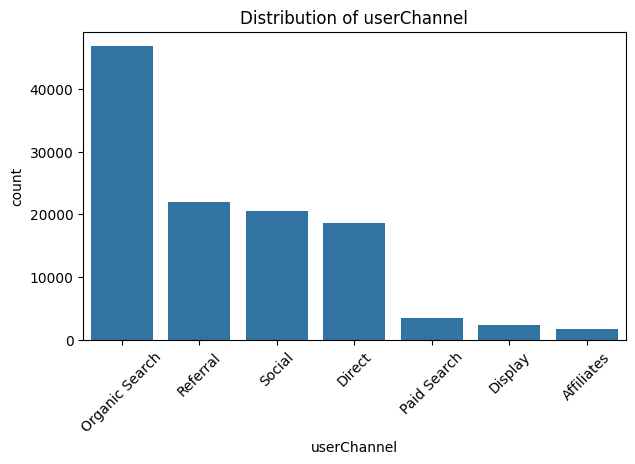

In [33]:
categorical_columns = ['trafficSource', 'os', 'browser', 'userChannel']

for col in categorical_columns:
    plt.figure(figsize=(7, 4))
    sns.barplot(df[col].value_counts())
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
    print()

In [34]:
df['trafficSource'].unique()

array(['youtube.com', '(direct)', 'google', 'phandroid.com',
       'mall.googleplex.com', 'google.com', 'Partners', 'mail.google.com',
       'yahoo', 'qiita.com', 'sites.google.com', 'dfa', 'bing',
       'reddit.com', 'search.tb.ask.com', 'chat.google.com',
       'groups.google.com', 'msn.com', 't.co', 'duckduckgo.com',
       'plus.url.google.com', 'googleads.g.doubleclick.net',
       'analytics.google.com', 'google.co.uk', 'l.facebook.com',
       'siliconvalley.about.com', 'facebook.com', 'quora.com',
       'sashihara.jp', 'baidu', 'm.facebook.com', 'optimize.google.com',
       'blog.golang.org', 'int.search.tb.ask.com',
       'gdeals.googleplex.com', 'adwords.google.com', 'lunametrics.com',
       'productforums.google.com', 'plus.google.com',
       'trainup.withgoogle.com', 'dealspotr.com', 'google.de',
       'google.co.jp', 'ask', 'aulagrado.esic.edu', 'search.xfinity.com',
       's0.2mdn.net', 'hangouts.google.com', 'online-metrics.com',
       'keep.google.com', 'gat

In [35]:
# The unique values are grouped according to their values
def group_traffic_source(source):
    source = str(source).lower()

    if 'youtube' in source:
        return 'YouTube'
    elif any(x in source for x in ['facebook', 'reddit', 'linkedin', 'twitter', 'vk', 'messenger', 'edu', 'blog', 'quora', 'wikipedia', 'insider', 'drawnames', 'phandroid', 'qiita', 'squishable']):
        return 'Social Media/Blog'
    elif any(x in source for x in ['google', 'doubleclick', 'bing', 'yahoo', 'duckduckgo', 'ask', 'aol', 'search', 'baidu', 'startpage', 'so.com']):
        return 'Search Engine'
    elif 'mail' in source or 'hangouts' in source or 'chat' in source or 'inbox' in source:
        return 'Email'
    elif 'corp.google.com' in source or 'sandbox.google.com' in source or 'googleplex' in source:
        return 'Internal/Corporate'
    else:
        return 'Other'

df['trafficSource_grouped'] = df['trafficSource'].apply(group_traffic_source)

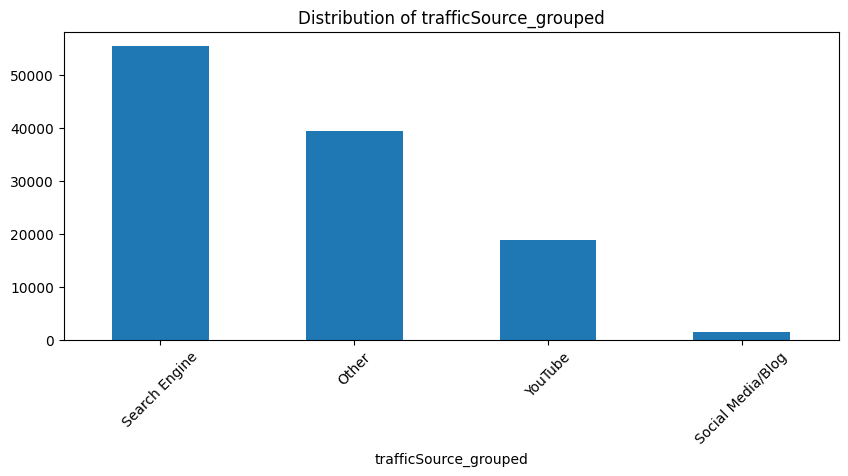

In [36]:
plt.figure(figsize=(10, 4))
df['trafficSource_grouped'].value_counts().plot(kind='bar')
plt.title(f'Distribution of trafficSource_grouped')
plt.xticks(rotation=45)
plt.show()
print()

In [37]:
# os is grouped with the largest 4 shown and the rest into others
top_6_os = df['os'].value_counts().nlargest(4).index

df['os_grouped'] = df['os'].apply(lambda x: x if x in top_6_os else 'Other')

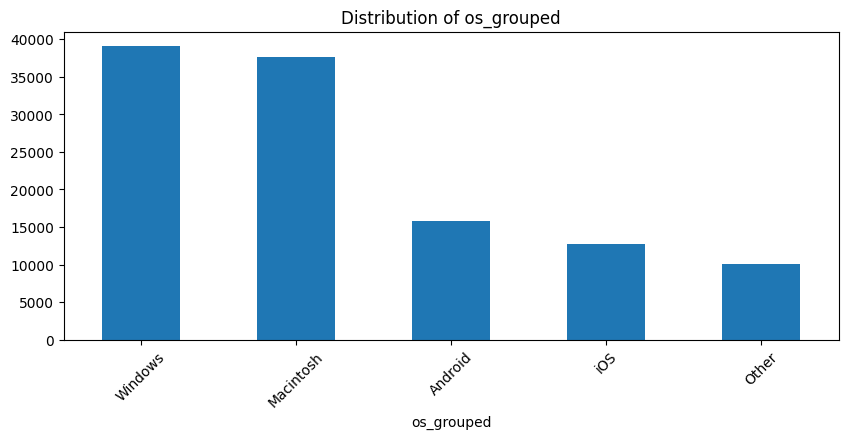

In [38]:
plt.figure(figsize=(10, 4))
df['os_grouped'].value_counts().plot(kind='bar')
plt.title(f'Distribution of os_grouped')
plt.xticks(rotation=45)
plt.show()
print()

In [39]:
#Similarly, browser is grouped with the largest 4 shown and the rest into others
top_6_browser = df['browser'].value_counts().nlargest(4).index

df['browser_grouped'] = df['browser'].apply(lambda x: x if x in top_6_browser else 'Other')

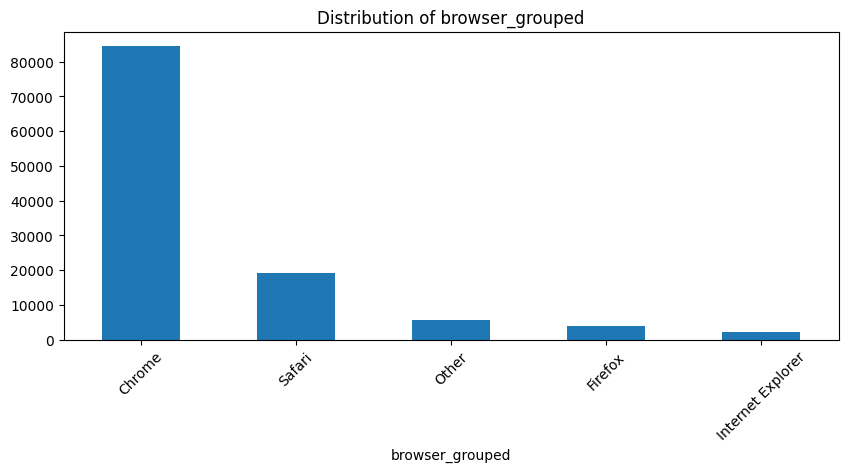

In [40]:
plt.figure(figsize=(10, 4))
df['browser_grouped'].value_counts().plot(kind='bar')
plt.title(f'Distribution of browser_grouped')
plt.xticks(rotation=45)
plt.show()
print()

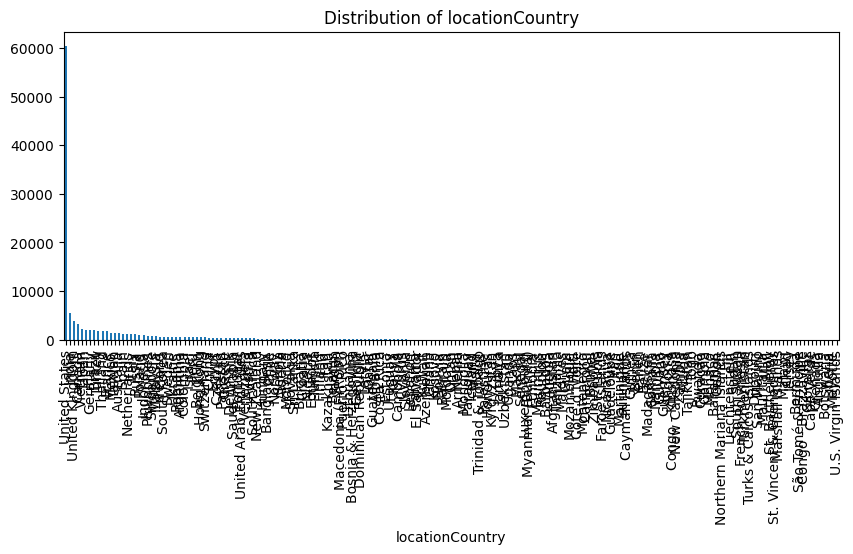

In [41]:
plt.figure(figsize=(10, 4))
df['locationCountry'].value_counts().plot(kind='bar')
plt.title(f'Distribution of locationCountry')
plt.xticks(rotation=90)
plt.show()
print()

## Bivariate
### Categorical vs. Categorical

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115313 entries, 0 to 116022
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trafficSource.isTrueDirect  115313 non-null  bool          
 1   purchaseValue               115313 non-null  float64       
 2   browser                     115313 non-null  object        
 3   geoCluster                  115313 non-null  object        
 4   geoNetwork.networkDomain    115313 non-null  object        
 5   gclIdPresent                115313 non-null  int64         
 6   sessionNumber               115313 non-null  int64         
 7   trafficSource               115313 non-null  object        
 8   os                          115313 non-null  object        
 9   geoNetwork.subContinent     115313 non-null  object        
 10  trafficSource.medium        115313 non-null  object        
 11  locationCountry             115313 non-null 

In [43]:
# Put Categorical Variables into a list
cat_cols = ['geoNetwork.continent', 'geoNetwork.subContinent', 'trafficSource_grouped', 'os_grouped', 'browser_grouped',
            'userChannel', 'trafficSource.medium','geoCluster','geoNetwork.networkDomain','deviceType','locationCountry']

In [44]:
from scipy.stats import chi2_contingency
from itertools import combinations

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] == 1 or confusion_matrix.shape[1] == 1:
        return np.nan  # avoid divide by zero
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Compute Cramér’s V matrix
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1, col2 in combinations(cat_cols, 2):
    v = cramers_v(df[col1], df[col2])
    cramers_matrix.loc[col1, col2] = v
    cramers_matrix.loc[col2, col1] = v

np.fill_diagonal(cramers_matrix.values, 1.0)
cramers_matrix = cramers_matrix.astype(float)

In [45]:
high_assoc = cramers_matrix.stack().reset_index()
high_assoc.columns = ['Var1', 'Var2', 'CramersV']
high_assoc = high_assoc[high_assoc['Var1'] != high_assoc['Var2']]
high_assoc = high_assoc[high_assoc['CramersV'] > 0.7].sort_values(by='CramersV', ascending=False)

print(high_assoc)

                        Var1                     Var2  CramersV
1       geoNetwork.continent  geoNetwork.subContinent  1.000000
10      geoNetwork.continent          locationCountry  1.000000
11   geoNetwork.subContinent     geoNetwork.continent  1.000000
21   geoNetwork.subContinent          locationCountry  1.000000
110          locationCountry     geoNetwork.continent  1.000000
111          locationCountry  geoNetwork.subContinent  1.000000
61               userChannel     trafficSource.medium  0.835423
71      trafficSource.medium              userChannel  0.835423
42                os_grouped               deviceType  0.712137
102               deviceType               os_grouped  0.712137
68      trafficSource.medium    trafficSource_grouped  0.708181
28     trafficSource_grouped     trafficSource.medium  0.708181


In [46]:
df.drop(columns=['geoNetwork.continent','userChannel','deviceType','os','trafficSource.medium', 'trafficSource','browser', 'locationCountry'], inplace=True)

# Each are dropped either because some other columns were highly correlated with each other, or because there is a grouped column of it.

### Categorical vs. Numerical (purchaseValue)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115313 entries, 0 to 116022
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trafficSource.isTrueDirect  115313 non-null  bool          
 1   purchaseValue               115313 non-null  float64       
 2   geoCluster                  115313 non-null  object        
 3   geoNetwork.networkDomain    115313 non-null  object        
 4   gclIdPresent                115313 non-null  int64         
 5   sessionNumber               115313 non-null  int64         
 6   geoNetwork.subContinent     115313 non-null  object        
 7   pageViews                   115313 non-null  float64       
 8   totals.bounces              115313 non-null  float64       
 9   date                        115313 non-null  datetime64[ns]
 10  totalHits                   115313 non-null  int64         
 11  sessionStart                115313 non-null 

In [48]:
df.nunique().sort_values(ascending=False)

sessionStart                  106688
purchaseValue                   6762
log_purchaseValue               6762
date                             638
sessionNumber                    230
totalHits                        225
pageViews                        175
geoNetwork.subContinent           22
browser_grouped                    5
geoCluster                         5
os_grouped                         5
trafficSource_grouped              4
geoNetwork.networkDomain           3
trafficSource.isTrueDirect         2
totals.bounces                     2
gclIdPresent                       2
new_visits                         2
device.isMobile                    2
dtype: int64

In [49]:
from scipy.stats import pointbiserialr
from scipy.stats import f_oneway

# The features are split into columns with multiple values and columns with binary values. This is to do ANOVA on multiple and Point Biserial on binary

cols_mult = ['date','sessionNumber','totalHits','geoNetwork.subContinent','browser_grouped','geoCluster','os_grouped','trafficSource_grouped','geoNetwork.networkDomain']

cols_bin = ['trafficSource.isTrueDirect','totals.bounces','gclIdPresent','new_visits','device.isMobile']


for col in cols_mult:
    groups = [group["log_purchaseValue"].values for name, group in df.groupby(col)]
    f_stat, p_val = f_oneway(*groups)
    print(col)
    print("ANOVA F-statistic:", f_stat)
    print("p-value:", p_val)
    print()

for col in cols_bin:
    corr, p_value = pointbiserialr(df[col], df['log_purchaseValue'])
    print(f"Point Biserial Correlation for {col}:", corr)

date
ANOVA F-statistic: 7.222222049600822
p-value: 0.0

sessionNumber
ANOVA F-statistic: 73.64696972931293
p-value: 0.0

totalHits
ANOVA F-statistic: 1160.510389515524
p-value: 0.0

geoNetwork.subContinent
ANOVA F-statistic: 1249.4093900353291
p-value: 0.0

browser_grouped
ANOVA F-statistic: 1192.665277217296
p-value: 0.0

geoCluster
ANOVA F-statistic: 4.1376470627336355
p-value: 0.0023638254485382594

os_grouped
ANOVA F-statistic: 3403.4827873973372
p-value: 0.0

trafficSource_grouped
ANOVA F-statistic: 2816.4193403029053
p-value: 0.0

geoNetwork.networkDomain
ANOVA F-statistic: 0.32320735724587474
p-value: 0.723824404463504

Point Biserial Correlation for trafficSource.isTrueDirect: 0.2605045793170943
Point Biserial Correlation for totals.bounces: -0.4217696936431337
Point Biserial Correlation for gclIdPresent: 0.0015104568104945574
Point Biserial Correlation for new_visits: -0.341001780321058
Point Biserial Correlation for device.isMobile: -0.19659684851501877


In [50]:
df.drop(columns=['gclIdPresent','geoNetwork.networkDomain'], inplace=True)

# geoNetwork.networkDomain has very weak correlation and gclIdPresent has no correlation

## Multivariate
### Correlation Matrix

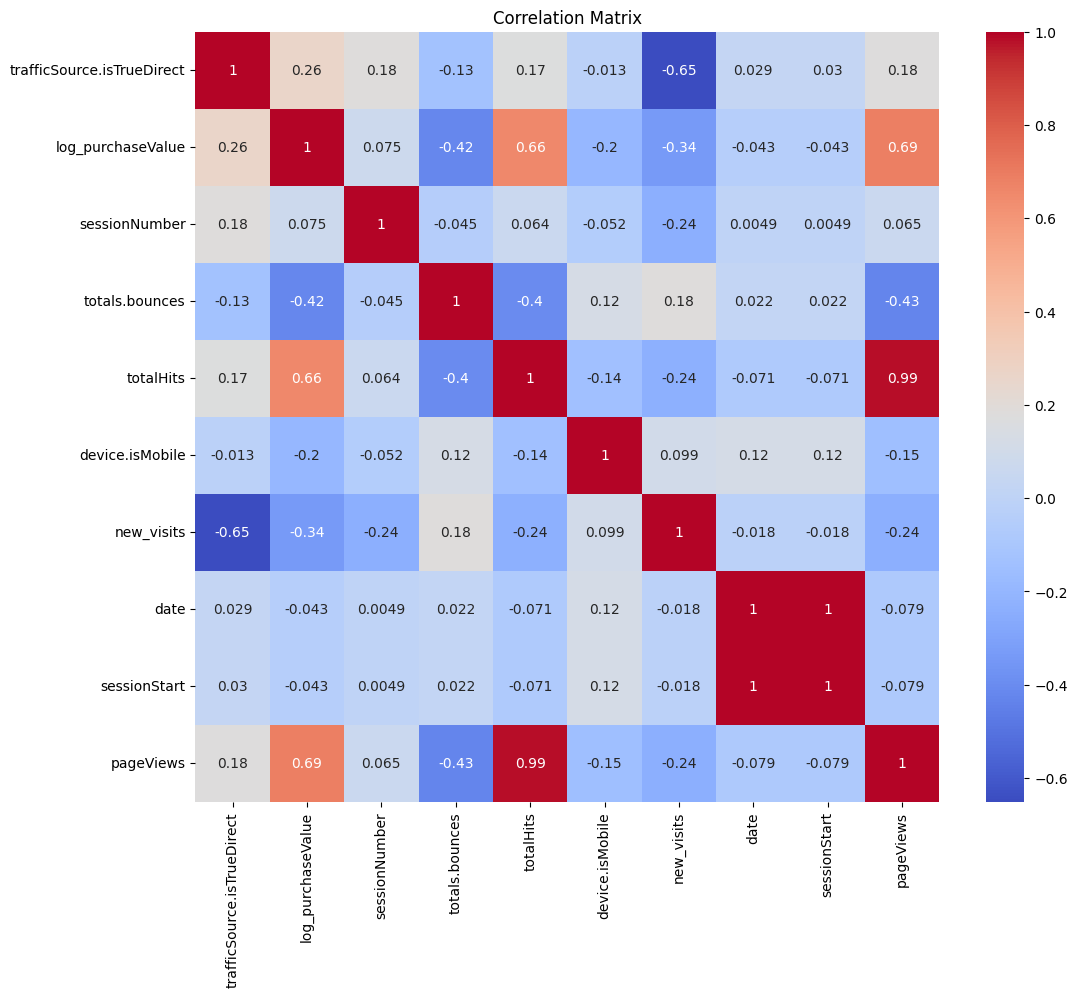

In [51]:
# The numerical columns' correlation is taken and plotted into a heatmap to get a correlation matrix
num_cols = ['trafficSource.isTrueDirect', 'log_purchaseValue','sessionNumber','totals.bounces','totalHits','device.isMobile','new_visits', 'date', 'sessionStart', 'pageViews']

plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [52]:
df.drop(columns=['date','sessionNumber','device.isMobile', 'trafficSource.isTrueDirect', 'totalHits'], inplace=True)

# pageViews and totalHits are almost perfectly correlated. pageViews is kept because it is more correlated with purchaseValue
# date and sessionStart is perfectly correlated to each other so only one is needed
# sessionNumber, device.isMobile have very weak correlation with purchaseValue
# new_visits and trafficSource.isTrueDirect is moderately correlated.
    # Since both are less correlated with the purchaseValue, we only take one. new_visits is more correlated so we can take that.

# 📌 Final Inspection

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115313 entries, 0 to 116022
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   purchaseValue            115313 non-null  float64       
 1   geoCluster               115313 non-null  object        
 2   geoNetwork.subContinent  115313 non-null  object        
 3   pageViews                115313 non-null  float64       
 4   totals.bounces           115313 non-null  float64       
 5   sessionStart             115313 non-null  datetime64[ns]
 6   new_visits               115313 non-null  float64       
 7   log_purchaseValue        115313 non-null  float64       
 8   trafficSource_grouped    115313 non-null  object        
 9   os_grouped               115313 non-null  object        
 10  browser_grouped          115313 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 10.6+ MB


In [54]:
df.head(15)

,purchaseValue,geoCluster,geoNetwork.subContinent,pageViews,totals.bounces,sessionStart,new_visits,log_purchaseValue,trafficSource_grouped,os_grouped,browser_grouped
0,0.0,Region_2,Northern America,1.0,1.0,2017-07-15 06:39:59,1.0,0.000000,YouTube,Windows,Other
1,0.0,Region_3,Northern America,1.0,1.0,2017-05-20 06:34:25,1.0,0.000000,Other,Macintosh,Chrome
2,0.0,Region_2,Southern Europe,6.0,0.0,2017-10-20 14:38:48,0.0,0.000000,Search Engine,Windows,Chrome
3,0.0,Region_4,Eastern Asia,1.0,1.0,2017-01-03 08:23:58,1.0,0.000000,YouTube,Windows,Internet Explorer
4,88950000.0,Region_3,Northern America,54.0,0.0,2016-10-07 01:43:53,1.0,18.303585,Other,Windows,Chrome
5,28000000.0,Region_4,Northern America,32.0,0.0,2017-09-15 20:10:52,0.0,17.147715,Other,Macintosh,Chrome
6,80510000.0,Region_2,Northern America,15.0,0.0,2016-08-24 15:51:37,1.0,18.203892,Other,Macintosh,Chrome
7,0.0,Region_5,Southeast Asia,1.0,1.0,2017-03-29 03:00:41,1.0,0.000000,Search Engine,Android,Chrome
8,0.0,Region_2,Eastern Asia,4.0,0.0,2017-05-25 08:50:57,0.0,0.000000,Search Engine,Macintosh,Chrome
9,0.0,Region_1,Eastern Asia,1.0,1.0,2017-07-24 04:01:08,1.0,0.000000,Search Engine,iOS,Safari


In [55]:
# Based on intuition, columns are double checked if there is any correlation

print(cramers_v(df['pageViews'], df['totals.bounces']))
print(cramers_v(df['geoCluster'], df['geoNetwork.subContinent']))
print(cramers_v(df['pageViews'], df['new_visits']))
print(cramers_v(df['os_grouped'], df['browser_grouped']))

0.9960710161998305
0.012860152122510215
0.31397534993876075
0.3779860838562141


In [56]:
# total.bounces and pageViews are highly correlated (pageViews is kept for more granulity)
df.drop(columns=['totals.bounces'], inplace=True)

# 📌 Feature Engineering

In [57]:
# New features are created based on sessionStart
df['session_dayofweek'] = df['sessionStart'].dt.dayofweek       # Says the day of the week (Monday, Tuesday, etc...)
df['session_month'] = df['sessionStart'].dt.month               # Says the month of session
df['session_daypart'] = pd.cut(                                 # Categorizes into 4 times of day
    df['sessionStart'].dt.hour,
    bins=[0, 6, 12, 18, 24],
    labels=['Late Night', 'Morning', 'Afternoon', 'Evening'],
    right=False
)

# sessionStart is dropped after losing usefulness
df.drop(columns='sessionStart',inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115313 entries, 0 to 116022
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   purchaseValue            115313 non-null  float64 
 1   geoCluster               115313 non-null  object  
 2   geoNetwork.subContinent  115313 non-null  object  
 3   pageViews                115313 non-null  float64 
 4   new_visits               115313 non-null  float64 
 5   log_purchaseValue        115313 non-null  float64 
 6   trafficSource_grouped    115313 non-null  object  
 7   os_grouped               115313 non-null  object  
 8   browser_grouped          115313 non-null  object  
 9   session_dayofweek        115313 non-null  int32   
 10  session_month            115313 non-null  int32   
 11  session_daypart          115313 non-null  category
dtypes: category(1), float64(4), int32(2), object(5)
memory usage: 9.8+ MB


In [59]:
df_cleaned = df

# 📌 Modeling with Preprocessing (using pipelines)

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time

In [61]:
X = df_cleaned.drop(columns=['purchaseValue', 'log_purchaseValue'])                             # Only log value is taken
y = df_cleaned['log_purchaseValue']

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()             # Divided into categorical and numerical for preprocessing
num_cols = X.select_dtypes(include=['int32', 'float64']).columns.tolist()

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [62]:
# Using pipeline, two models are connected with preprocessor

lr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

sgd_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(random_state=42, max_iter=1000, tol=1e-3, early_stopping=True, n_iter_no_change=5))
])

In [63]:
# Hyperparameter Grids are created for tuning
lr_param_grid = {
    'regressor__fit_intercept': [True, False],
}

sgd_param_grid = {
    'regressor__loss': ['squared_error','huber'],
    'regressor__penalty': ['l2', 'l1', 'elasticnet'],
    'regressor__alpha': [0.0001, 0.001],
    'regressor__learning_rate': ['optimal', 'adaptive'],
    'regressor__eta0': [0.01, 0.1]
}

results = {}

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
lr_search = GridSearchCV(lr_pipe, lr_param_grid, cv=5, scoring='r2', n_jobs=-1)

start = time.time()
lr_search.fit(X_train, y_train)
end = time.time()

print("Runtime:", end-start)

y_pred_lr = lr_search.predict(X_test)
print("Best Params:", lr_search.best_params_)
print("RMSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

Runtime: 5.2154154777526855
Best LR Params: {'regressor__fit_intercept': False}
LR RMSE: 23.028799241642325
LR R² Score: 0.5612551073388743


In [66]:
results['Linear Regression'] = {
          'R²':r2_score(y_test, y_pred_lr),
           'RMSE':mean_squared_error(y_test, y_pred_lr),
          'Time':(end-start)}

In [67]:
sgd_random = RandomizedSearchCV(sgd_pipe, sgd_param_grid, n_iter=30, scoring='r2', cv=5, random_state=42, n_jobs=-1)

start = time.time()
sgd_random.fit(X_train, y_train)
end = time.time()

print("Runtime:", end-start)

y_pred_sgd = sgd_random.predict(X_test)
print("Best Params:", sgd_random.best_params_)
print("RMSE:", mean_squared_error(y_test, y_pred_sgd))
print("R² Score:", r2_score(y_test, y_pred_sgd))

Runtime: 49.69207692146301
Best SGD Params: {'regressor__penalty': 'elasticnet', 'regressor__loss': 'squared_error', 'regressor__learning_rate': 'adaptive', 'regressor__eta0': 0.01, 'regressor__alpha': 0.001}
SGD RMSE: 23.03752594266458
SGD R² Score: 0.5610888461516053


In [68]:
results['SGD Regression'] = {
          'R²':r2_score(y_test, y_pred_sgd),
           'RMSE':mean_squared_error(y_test, y_pred_sgd),
          'Time':(end-start)}

In [69]:
# Take the best model and sort using most infleuntial to know which columns are most important
best_model = lr_search.best_estimator_

feature_names = best_model.named_steps['preprocessor'].get_feature_names_out(X.columns)

importance = pd.Series(best_model.named_steps['regressor'].coef_, index=feature_names)

print(importance.sort_values(key=abs, ascending=False))

num__pageViews                                     4.062729
cat__geoNetwork.subContinent_Northern America      2.063029
cat__os_grouped_Macintosh                          1.611571
cat__trafficSource_grouped_Other                   1.181552
cat__geoNetwork.subContinent_Polynesia             1.114276
cat__os_grouped_Other                              0.957807
num__new_visits                                   -0.868326
cat__os_grouped_Android                           -0.816153
cat__browser_grouped_Internet Explorer             0.750609
cat__trafficSource_grouped_YouTube                 0.736153
cat__session_daypart_Evening                       0.722642
cat__session_daypart_Afternoon                     0.722339
cat__geoNetwork.subContinent_Melanesia            -0.696291
cat__browser_grouped_Chrome                        0.685147
cat__trafficSource_grouped_Social Media/Blog      -0.605390
cat__trafficSource_grouped_Search Engine           0.559536
cat__browser_grouped_Safari             

# 📌 Insights on EDA and Linear Models
## Linear Models Insights

- Based on the above baseline modeling, we can interpret that both Linear Regression and Stochastic Gradient Descent Regressor scored averagely in performance metrics, with LR performing slightly better than SGD but the difference was not significant.
- These models proved to be an average predictor on unseen data and struggle to capture the complex patterns in the data. This could be due to dataset being rightskewed, which violates the assumption of linear models.
- Ensemble models might perform better since it is useful for skewed or complex data.
- Linear Models fails to capture non-linear relationships.
## EDA Insights:
- Users who view more pages are more likely to make higher purchases.
- Users in Northern America spend more (This might be due to purchasing being more concentrated on USA)
- Users purchasing in macbooks are more likely to spend more. Might indicate wealthier demographic.
- Android users spend less than average than others
- Visitors from Social Media / Blogs may not make high purchases


# 📌 Dimensionality Reduction

In [70]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

In [71]:
X = df_cleaned.drop(columns=['purchaseValue', 'log_purchaseValue'])                             # Only log value is taken
y = df_cleaned['log_purchaseValue']

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()             # Divided into categorical and numerical for preprocessing
num_cols = X.select_dtypes(include=['int32', 'float64']).columns.tolist()

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [72]:
# Assign the feature selector and pca methods

selector = SelectKBest(score_func=f_regression, k=30)

pca = PCA(n_components=0.95)

# 📌 Classic Machine Learning Models

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [12]:
knn = KNeighborsRegressor(n_jobs=-1)
svr = SVR(kernel='linear') # rbf and poly kernels have O(n²) time complexity. Runtime will be too long

#KNN makes predictions based on the average of the closest k training examples in the feature space.
#It look at the closest datapoints by calculating the Euclidian Distance

#SVR is a regression version of Support Vector Machines (SVMs).
#It tries to draw a smooth line or curve that predicts the data while ignoring small errors within a certain range

In [114]:
# Create pipelines connecting models with other processes

knn_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('feature_select', selector),
    ('pca', pca),
    ('regressor', knn)
])


svr_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('feature_select', selector),
    ('pca', pca),
    ('regressor', svr)
])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1]:
# Create parameter grid for KNN and SVR

knn_params = {
    'regressor__n_neighbors' : [3, 5, 10],
    'regressor__weights' : ['uniform','distance'],
    'regressor__algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'regressor__leaf_size' : [30, 50]
}

svr_params = {
    'regressor__C': [0.1, 1, 10],
    'regressor__epsilon': [0.1, 0.2],
    'regressor__tol': [1e-3],
}

In [80]:
knn_search = RandomizedSearchCV(knn_pipe, knn_params, cv=3, scoring='r2', n_iter=30, random_state=42, n_jobs=-1)
start = time.time()
knn_search.fit(X_train, y_train)
end = time.time()

print("Runtime:", end-start)

y_pred_knn = knn_search.predict(X_test)
print("Best Params:", knn_search.best_params_)
print("RMSE:", mean_squared_error(y_test, y_pred_knn))
print("R² Score:", r2_score(y_test, y_pred_knn))

results['KNN'] = {
          'R²':r2_score(y_test, y_pred_knn),
           'RMSE':mean_squared_error(y_test, y_pred_knn),
          'Time':(end-start)}

Runtime: 194.40012979507446
Best KNN Params: {'regressor__weights': 'uniform', 'regressor__n_neighbors': 10, 'regressor__leaf_size': 50, 'regressor__algorithm': 'brute'}
KNN RMSE: 12.10124658213948
KNN R² Score: 0.7694469400234366


In [ ]:
svr_search = RandomizedSearchCV(svr_pipe, svr_params, n_iter= 30, cv=3, scoring='r2', n_jobs=-1, random_state=42)

start = time.time()
svr_search.fit(X_train, y_train)
end = time.time()

print("Runtime:", end-start)

y_pred_svr = svr_search.predict(X_test)
print("Best Params:", svr_search.best_params_)
print("RMSE:", mean_squared_error(y_test, y_pred_svr))
print("R² Score:", r2_score(y_test, y_pred_svr))

results['Linear SVR'] = {
          'R²':r2_score(y_test, y_pred_svr),
           'RMSE':mean_squared_error(y_test, y_pred_svr),
          'Time':(end-start)}

# 📌 Ensemble Models

In [14]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [15]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)

# Random Forest builds many decision trees and averages their results to make a prediction.

# XGBoost also uses many decision trees, but builds them one at a time, where each tree learns from the errors of the previous trees.

In [117]:
# Create pipelines connecting models with other processes

rf_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('feature_select', selector),
    ('pca', pca),
    ('regressor', rf)
])

xgb_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('feature_select', selector),
    ('pca', pca),
    ('regressor', xgb)
])

In [2]:
# Create parameter grid for Random Forest and XGBoost
rf_params = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 15, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

xgb_params = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__subsample': [0.7, 0.8, 1.0],
    'regressor__colsample_bytree': [0.7, 0.8, 1.0],
    'regressor__gamma': [0, 0.1, 0.3]
}

In [85]:
rf_search = RandomizedSearchCV(rf_pipe, rf_params, n_iter=30, cv=3, random_state=42, scoring='r2')
start = time.time()
rf_search.fit(X_train, y_train)
end = time.time()

print("Runtime:", end-start)

rf_knn = rf_search.predict(X_test)
print("Best Params:", rf_search.best_params_)
print("RMSE:", mean_squared_error(y_test, rf_knn))
print("R² Score:", r2_score(y_test, rf_knn))

results['RandomForest'] = {
          'R²':r2_score(y_test, rf_knn),
           'RMSE':mean_squared_error(y_test, rf_knn),
          'Time':(end-start)}

Runtime: 386.2561922073364
Best RandomForest Params: {'regressor__n_estimators': 300, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 4, 'regressor__max_features': 'log2', 'regressor__max_depth': 15}
RandomForest RMSE: 11.159618055080877
RandomForest R² Score: 0.7873868552876211


In [86]:
xgb_search = RandomizedSearchCV(xgb_pipe, xgb_params, cv=3, scoring='r2', n_iter=100, random_state=42)
start = time.time()
xgb_search.fit(X_train, y_train)
end = time.time()

print("Runtime:", end-start)

xgb_knn = xgb_search.predict(X_test)
print("Best Params:", xgb_search.best_params_)
print("RMSE:", mean_squared_error(y_test, xgb_knn))
print("R² Score:", r2_score(y_test, xgb_knn))

results['XGB'] = {
          'R²':r2_score(y_test, xgb_knn),
           'RMSE':mean_squared_error(y_test, xgb_knn),
          'Time':(end-start)}

Runtime: 200.45087909698486
Best XGB Params: {'regressor__subsample': 0.8, 'regressor__n_estimators': 100, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.1, 'regressor__gamma': 0.1, 'regressor__colsample_bytree': 1.0}
XGB RMSE: 11.094149937159138
XGB R² Score: 0.7886341544658761


# 📌 MultiLayer Percepton Regressor

In [16]:
from sklearn.neural_network import MLPRegressor
from scipy.stats import uniform, randint

In [17]:
mlp = MLPRegressor(max_iter=500, random_state=42)

# A basic type of neural network
# It mimics a brain through layers of connected neurons using math functions.

In [118]:
# Create pipelines connecting MLP with other processes 

mlp_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('feature_select', selector),
    ('pca', pca),
    ('regressor', mlp)
])

In [5]:
# Create parameter grid for MLP
mlp_params = {
    'regressor__hidden_layer_sizes': [(64, 32), (128, 64)],
    'regressor__activation': ['tanh'],
    'regressor__solver': ['adam'],
    'regressor__alpha': uniform(0.0001, 0.01),  # L2 regularization
    'regressor__learning_rate': ['constant', 'adaptive'],
    'regressor__learning_rate_init': uniform(0.001, 0.01)
}

In [100]:
mlp_search = RandomCizedSearchCV(mlp_pipe, mlp_params, cv=3, scoring='r2', n_iter=10, random_state=42, n_jobs=-1)

start = time.time()
mlp_search.fit(X_train, y_train)
end = time.time()

print("Runtime:", end-start)

mlp_knn = mlp_search.predict(X_test)
print("Best Params:", mlp_search.best_params_)
print("RMSE:", mean_squared_error(y_test, mlp_knn))
print("R² Score:", r2_score(y_test, mlp_knn))

results['MLP'] = {
          'R²':r2_score(y_test, mlp_knn),
           'RMSE':mean_squared_error(y_test, mlp_knn),
          'Time':(end-start)}

Runtime: 918.007875919342
Best MLP Params: {'regressor__activation': 'tanh', 'regressor__alpha': np.float64(0.007180725777960455), 'regressor__hidden_layer_sizes': (128, 64), 'regressor__learning_rate': 'constant', 'regressor__learning_rate_init': np.float64(0.010699098521619942), 'regressor__solver': 'adam'}
MLP RMSE: 11.513465183024136
MLP R² Score: 0.7806453565868473


# 📌 Final Touches

## Recursive Feature Elimination (RFE)

- RFE trains the model on full feature set and ranks them based on model coefficients or feature importances.
- The least important features are eliminated

In [86]:
from sklearn.feature_selection import RFE

X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(exclude=['object', 'category']).columns.tolist()

ohe = preprocessor.named_transformers_['cat']
encoded_cat_cols = ohe.get_feature_names_out(categorical_cols)
final_feature_names = numerical_cols + list(encoded_cat_cols)

X_train_df = pd.DataFrame(X_train_pre, columns=final_feature_names)
X_test_df = pd.DataFrame(X_test_pre, columns=final_feature_names)

### XGBoost

In [91]:
xgb_rfe = XGBRegressor()
rfe = RFE(estimator=xgb_rfe, n_features_to_select=30)
rfe.fit(X_train_df, y_train)

selected_features = X_train_df.columns[rfe.support_]

X_train_rfe = X_train_df[selected_features]
X_test_rfe = X_test_df[selected_features]

xgb_rfe_pipe = Pipeline([
    ('regressor', xgb)
])

In [92]:
xgb_rfe_search = RandomizedSearchCV(xgb_rfe_pipe, xgb_params, cv=3, scoring='r2', n_iter=100, random_state=42)
start = time.time()
xgb_rfe_search.fit(X_train_rfe, y_train)
end = time.time()

print("Runtime:", end-start)

xgb_rfe_pred = xgb_rfe_search.predict(X_test_rfe)
print("Best Params:", xgb_rfe_search.best_params_)
print("RMSE:", mean_squared_error(y_test, xgb_rfe_pred))
print("R² Score:", r2_score(y_test, xgb_rfe_pred))

results['XGB_RFE'] = {
          'R²':r2_score(y_test, xgb_rfe_pred),
           'RMSE':mean_squared_error(y_test, xgb_rfe_pred),
          'Time':(end-start)}

Runtime: 97.5268247127533
Best XGB Params: {'regressor__subsample': 0.8, 'regressor__n_estimators': 100, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.1, 'regressor__gamma': 0.3, 'regressor__colsample_bytree': 0.7}
XGB RMSE: 10.525197266709595
XGB R² Score: 0.7994738459194477


### Random Forest

In [87]:
rf_rfe = RandomForestRegressor()
rfe = RFE(estimator=rf_rfe, n_features_to_select=30)
rfe.fit(X_train_df, y_train)

selected_features = X_train_df.columns[rfe.support_]

X_train_rfe = X_train_df[selected_features]
X_test_rfe = X_test_df[selected_features]


rf_rfe_pipe = Pipeline([
    ('regressor', rf_rfe)
])

In [134]:
rf_rfe_search = RandomizedSearchCV(rf_rfe_pipe, rf_params, cv=3, scoring='r2', n_iter=30, random_state=42)
start = time.time()
rf_rfe_search.fit(X_train_rfe, y_train)
end = time.time()

print("Runtime:", end-start)

rf_rfe_pred = rf_rfe_search.predict(X_test_rfe)
print("Best Params:", rf_rfe_search.best_params_)
print("RMSE:", mean_squared_error(y_test, rf_rfe_pred))
print("R² Score:", r2_score(y_test, rf_rfe_pred))

results['RF_RFE'] = {
          'R²':r2_score(y_test, rf_rfe_pred),
           'RMSE':mean_squared_error(y_test, rf_rfe_pred),
          'Time':(end-start)}

Runtime: 1478.0004270076752
Best XGB Params: {'regressor__n_estimators': 300, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 15}
XGB RMSE: 10.80862003584813
XGB R² Score: 0.794074072743322


In [88]:
rf_rfe_search = RandomizedSearchCV(rf_rfe_pipe, rf_params, cv=3, scoring='r2', n_iter=30, random_state=42)
start = time.time()
rf_rfe_search.fit(X_train_rfe, y_train)
end = time.time()

print("Runtime:", end-start)

rf_rfe_pred = rf_rfe_search.predict(X_test_rfe)
print("Best Params:", rf_rfe_search.best_params_)
print("RMSE:", mean_squared_error(y_test, rf_rfe_pred))
print("R² Score:", r2_score(y_test, rf_rfe_pred))

results['RF_RFE'] = {
          'R²':r2_score(y_test, rf_rfe_pred),
           'RMSE':mean_squared_error(y_test, rf_rfe_pred),
          'Time':(end-start)}

Runtime: 414.5298852920532
Best XGB Params: {'regressor__n_estimators': 300, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 15}
XGB RMSE: 10.831743097563258
XGB R² Score: 0.7936335319611584


## Feature Importance

### XGBoost

XGBoost uses weight (frequency of it used), gain(most informative), and cover(number of samples affected by split) to select important features

In [93]:
xgb.fit(X_train_df, y_train)

importances = xgb.feature_importances_
feature_names = X_train_df.columns

feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances}).sort_values(by='Importance', ascending=False)

top_features = feature_df['Feature'].head(30).tolist()
X_train_top = X_train_df[top_features]
X_test_top = X_test_df[top_features]


xgb_fi_pipe = Pipeline([
    ('regressor', xgb)
])



xgb_fi_search = RandomizedSearchCV(xgb_fi_pipe, xgb_params, cv=3, scoring='r2', n_iter=100, random_state=42)
start = time.time()
xgb_fi_search.fit(X_train_top, y_train)
end = time.time()

print("Runtime:", end-start)

xgb_fi_pred = xgb_fi_search.predict(X_test_top)
print("Best Params:", xgb_fi_search.best_params_)
print("RMSE:", mean_squared_error(y_test, xgb_fi_pred))
print("R² Score:", r2_score(y_test, xgb_fi_pred))

results['XGB_FI'] = {
          'R²':r2_score(y_test, xgb_fi_pred),
           'RMSE':mean_squared_error(y_test, xgb_fi_pred),
          'Time':(end-start)}

Runtime: 94.36948919296265
Best XGB Params: {'regressor__subsample': 0.8, 'regressor__n_estimators': 100, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.1, 'regressor__gamma': 0.3, 'regressor__colsample_bytree': 0.7}
XGB RMSE: 10.537130537922488
XGB R² Score: 0.7992464931277342


### Random Forest
RF uses Gini Impurity and Permutation Importance (how performance drops when features value's are randomly shuffled)

In [ ]:
rf_base = RandomForestRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)


rf_base.fit(X_train_df, y_train)

importances = rf_base.feature_importances_
feature_names = X_train_df.columns

feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_features_rf = feature_df['Feature'].head(30).tolist()

X_train_rf = X_train_df[top_features_rf]
X_test_rf = X_test_df[top_features_rf]

rf_fi_pipe = Pipeline([
    ('regressor', rf_base)
])

rf_params = {
    'regressor__n_estimators': [200, 300],
    'regressor__max_depth': [None, 15, 30],
    'regressor__min_samples_split': [2, 5]
    'regressor__min_samples_leaf': [2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

xgb_pre_search = RandomizedSearchCV(rf_fi_pipe, rf_params, cv=3, scoring='r2', n_iter=100, random_state=42)
start = time.time()
xgb_pre_search.fit(X_train_xgb, y_train)
end = time.time()

print("Runtime:", end-start)

xgb_pre_pred = xgb_pre_search.predict(X_test_xgb)
print("Best Params:", xgb_pre_search.best_params_)
print("RMSE:", mean_squared_error(y_test, xgb_pre_pred))
print("R² Score:", r2_score(y_test, xgb_pre_pred))

results['XGB_pre'] = {
          'R²':r2_score(y_test, xgb_pre_pred),
           'RMSE':mean_squared_error(y_test, xgb_pre_pred),
          'Time':(end-start)}

In [107]:
rf_base = RandomForestRegressor(n_jobs=-1)


rf_base.fit(X_train_df, y_train)

importances = rf_base.feature_importances_
feature_names = X_train_df.columns

feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_features_rf = feature_df['Feature'].head(30).tolist()

X_train_rf = X_train_df[top_features_rf]
X_test_rf = X_test_df[top_features_rf]

rf_fi_pipe = Pipeline([
    ('regressor', rf_base)
])

rf_params = {
    'regressor__n_estimators': [200, 300],
    'regressor__max_depth': [None, 15, 30],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

rf_pre_search = RandomizedSearchCV(rf_fi_pipe, rf_params, cv=3, scoring='r2', n_iter=30, random_state=42)
start = time.time()
rf_pre_search.fit(X_train_rf, y_train)
end = time.time()

print("Runtime:", end-start)

rf_pre_pred = rf_pre_search.predict(X_test_rf)
print("Best Params:", rf_pre_search.best_params_)
print("RMSE:", mean_squared_error(y_test, rf_pre_pred))
print("R² Score:", r2_score(y_test, rf_pre_pred))

results['RF_FI'] = {
          'R²':r2_score(y_test, rf_pre_pred),
           'RMSE':mean_squared_error(y_test, rf_pre_pred),
          'Time':(end-start)}

Runtime: 193.06323528289795
Best Params: {'regressor__n_estimators': 300, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 15}
RMSE: 10.938796217816753
R² Score: 0.7915939549401505


### Plotting the scores of XGBoost Models

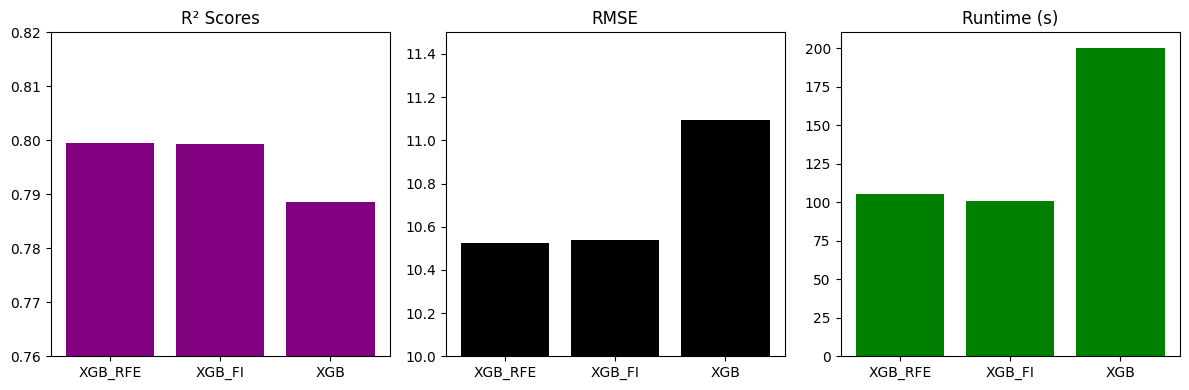

In [126]:
import matplotlib.pyplot as plt

model_names = ['XGB_RFE','XGB_FI','XGB']
r2_scores = [results[m]['R²'] for m in model_names]
rmse_scores = [results[m]['RMSE'] for m in model_names]
times = [results[m]['Time'] for m in model_names]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(model_names, r2_scores, color='purple')
plt.title("R² Scores")
plt.ylim(0.76,0.82)

plt.subplot(1, 3, 2)
plt.bar(model_names, rmse_scores, color='black')
plt.title("RMSE")
plt.ylim(10,11.5)

plt.subplot(1, 3, 3)
plt.bar(model_names, times, color='green')
plt.title("Runtime (s)")

plt.tight_layout()
plt.show()

### Using SHAP to explain XGBoost Model
- SHAP (SHapley Additive exPlanations) explains machine learning models by assigning each feature an importance value for a particular prediction, based on game theory.
- It explains why the model predicted a specific value by showing how features pushed the prediction up or down from the average.

100%|===================| 23019/23063 [01:15<00:00]        

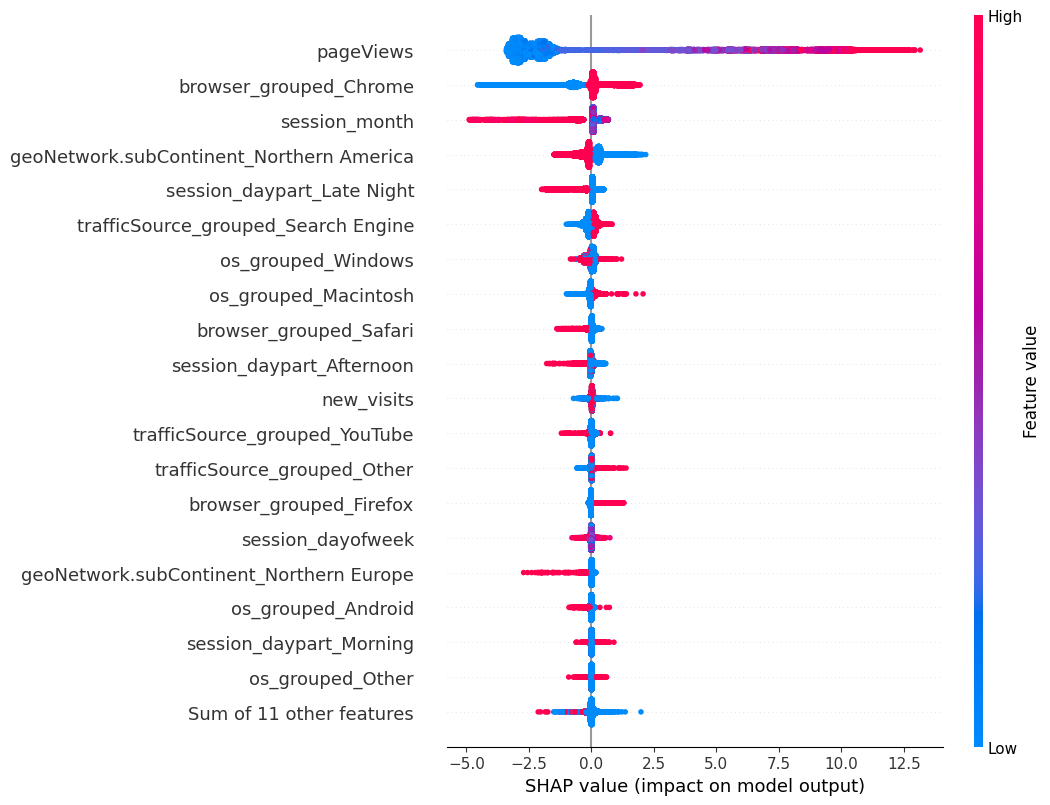

In [145]:
import shap

best_xgb_rfe_model = xgb_rfe_search.best_estimator_ 

explainer_xgb = shap.Explainer(best_xgb_rfe_model.named_steps['regressor'], X_train_top)
shap_values_xgb = explainer_xgb(X_test_top)
shap.plots.beeswarm(shap_values_xgb, max_display=20)

## Stacking Regressor
- Stacking regressor combines multiple regressor models to improve predictive performance using a meta-model.

In [109]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
  
best_xgbfi_model = xgb_fi_search.best_estimator_   
best_xgb_rfe_model = xgb_rfe_search.best_estimator_  
best_rf_rfe_model = rf_rfe_search.best_estimator_    
best_rf_fi_model = rf_pre_search.best_estimator_


estimators = [
    ('xgb_fi', best_xgbfi_model),
    ('xgb_rfe', best_xgb_rfe_model),
    ('rf_rfe', best_rf_rfe_model),
    ('rf_fi',best_rf_fi_model),
]

stack = StackingRegressor(estimators=estimators, final_estimator=RidgeCV(), cv=3, n_jobs=-1)

start = time.time()
stack.fit(X_train_top, y_train)
end = time.time()

print("Runtime:", end-start)

stack_pred = stack.predict(X_test_top)
print("Stack RMSE:", mean_squared_error(y_test, stack_pred))
print("Stack R² Score:", r2_score(y_test, stack_pred))

results['Stack'] = {
          'R²':r2_score(y_test, stack_pred),
           'RMSE':mean_squared_error(y_test, stack_pred),
          'Time':(end-start)}

Runtime: 40.407063007354736
Stack RMSE: 10.408332205453503
Stack R² Score: 0.8017003601297032


# 📌 Models Comparison

In [108]:
results_df = pd.DataFrame(results).T.sort_values('R²', ascending=False)
results_df

,R²,RMSE,Time
XGB_RFE,0.799474,10.525197,97.526825
XGB_FI,0.799246,10.537131,94.369489
RF_RFE,0.793634,10.831743,414.529885
RF_FI,0.791594,10.938796,193.063235
XGB,0.788634,11.094150,198.464437
Linear Regression,0.561255,23.028799,5.215415
SGD Regression,0.561089,23.037526,49.692077


# 📌 Saving Model

In [112]:
import joblib

# Save best model to a file
joblib.dump(stack, 'models/final_model.pkl')

# Save the preprocessor
joblib.dump(preprocessor, 'models/preprocessor.pkl')

print("Model and preprocessor saved successfully.")

Model and preprocessor saved successfully.


# 📌 Conclusion

- The stacked model combining XGB_RFE, XGB_FI, and RF_RFE provided the best results
with an R² score of 0.801 and RMSE of approximately 10.43. 
- Feature selection using Recursive Feature Elimination (RFE) and Feature Importance proved beneficial in
boosting model performance.
- SHAP values helped interpret the top contributing features.

- Future improvements can include trying LightGBM or CatBoost, using AutoML frameworks,
and developing a live web app using Streamlit or Flask for real-time predictions.